# Name: Pragya Shukla
# Roll No: MDS202027

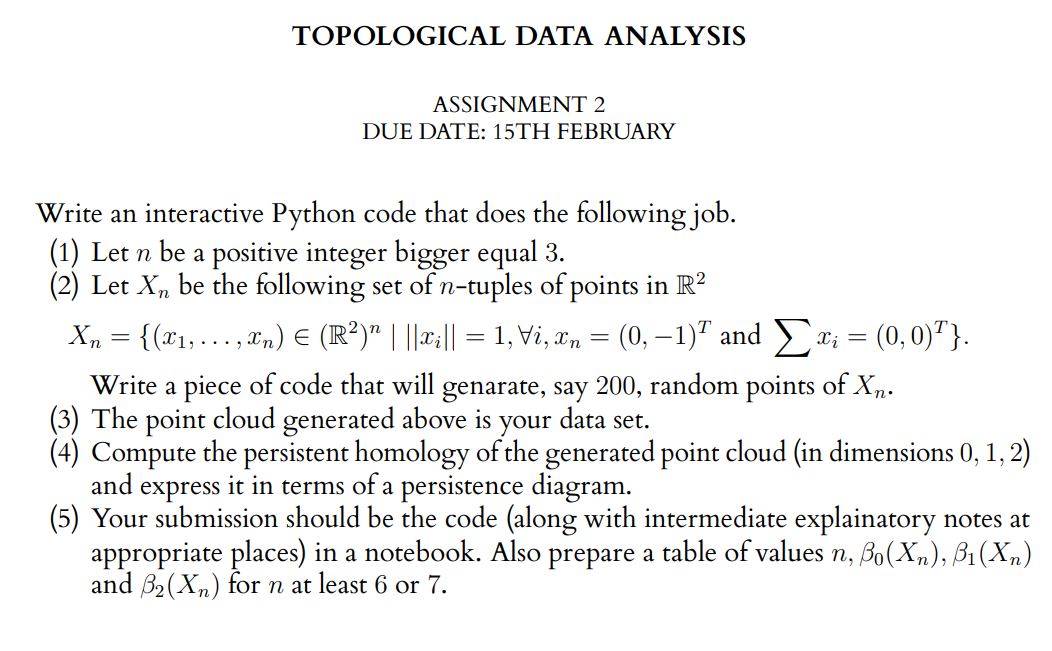

**Import libraries**

In [1]:
#!pip install gudhi

In [2]:
import numpy as np
import gudhi as gd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

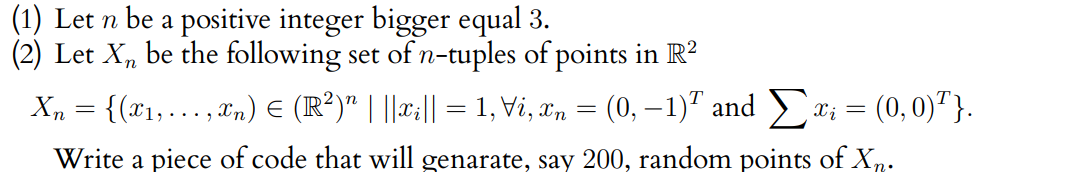

In [3]:
n = 4   # n>3
N = 200 # N = 200

In [4]:
def generate_function(n):
    points = np.random.uniform(-1, 1, (n-2, 2))
    points = np.vstack([points, np.array([[0, -1]])])
    points /= np.linalg.norm(points, ord=2, axis=-1, keepdims=True)
    points = np.vstack([points, -points.sum(axis=0)])
    return points
point_cloud = lambda N, n: np.array([generate_function(n) for _ in range(N)])

In [5]:
point_cloud_new = point_cloud(N, n)
point_cloud = point_cloud_new.reshape(N, -1)

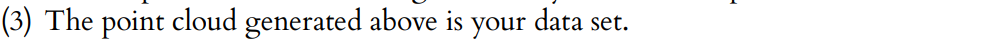

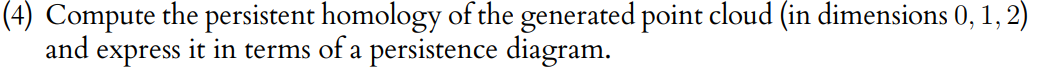

In [6]:
def persistence_diag(length, max_dimension=2):
    rc = gd.RipsComplex(points=point_cloud, max_edge_length=length)
    tree = rc.create_simplex_tree(max_dimension=max_dimension)
    diag = tree.persistence()
    data = PCA(n_components=3).fit_transform(point_cloud)
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    # Plot 1
    ax[0].scatter(data[:, 0], data[:, 1])
    ax[0].set_title("Data Set after PCA projection")
    # Plot 2
    gd.plot_persistence_barcode(diag, axes=ax[1])
    # Plot 3
    gd.plot_persistence_diagram(diag, axes=ax[2])
    plt.show()

usetex mode requires TeX.


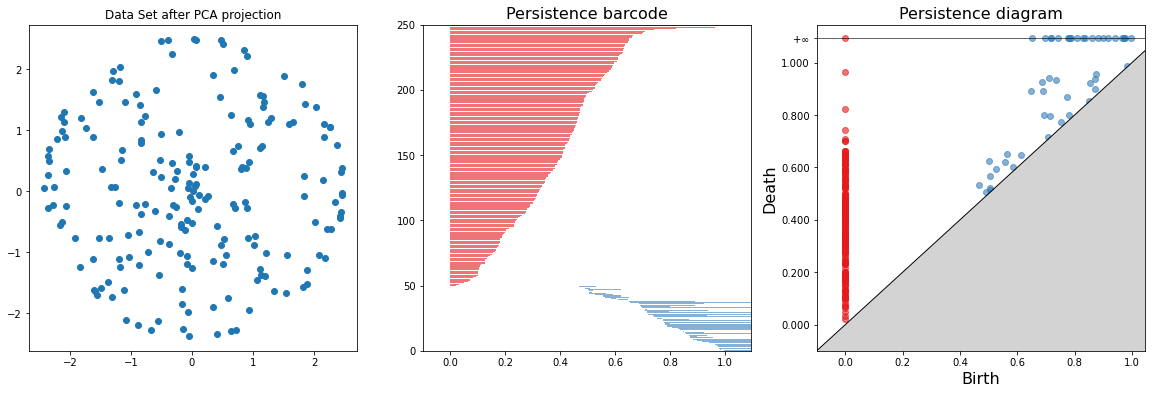

In [7]:
persistence_diag(length=1.0)

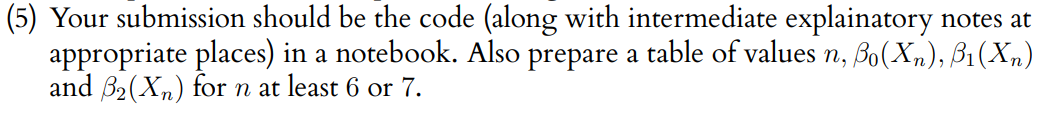

In [8]:
class Betti_Number:
    def __init__(self, N, n):
        self.point_cloud = point_cloud

    def tree(self, max_edge_length, max_dimension=2):
        rc = gd.RipsComplex(points=self.point_cloud, max_edge_length=max_edge_length)
        self.tr = rc.create_simplex_tree(max_dimension=max_dimension)
        self.diag = self.tr.persistence()

    def betty_numbers(self, homology_coeff_field=2, max_betty_num=3):
        self.tr.compute_persistence(homology_coeff_field=homology_coeff_field)
        b_nums = self.tr.betti_numbers()
        if len(b_nums) >= max_betty_num:
            return  b_nums[:max_betty_num]
        return b_nums + [0]*(max_betty_num - len(b_nums))

In [9]:
obj = Betti_Number(N = 200, n = 4)
obj.tree(max_edge_length = 1.0)

for i, y in enumerate(obj.betty_numbers()):
    print(f"B_{i} = {y}")

B_0 = 1
B_1 = 22
B_2 = 0


In [10]:
list1 = []
for n in range(3, 8):   # to ensure n>=3 and n goes atleast till 6 or 7.
    obj = Betti_Number(N = 200, n = n)
    obj.tree(max_edge_length = 3)
    row = obj.betty_numbers()
    row.insert(0, n)
    list1.append(row)
betti_no_dataframe = pd.DataFrame(list1, columns=['n', 'B0', 'B1', 'B2'])

In [11]:
betti_no_dataframe

,n,B0,B1,B2
0,3,1,0,0
1,4,1,0,0
2,5,1,0,0
3,6,1,0,0
4,7,1,0,0


**Above are the Betti numbers for different values of n.**